# COVID-19 Tweets: Exploratory Data Analysis and Text Analysis
## Alexis Virgen - ITESM (Mexico)
### On this notebook I made a sentiment analysis for some relevant dates on the covid timeline, the functions used in this notebook were tested [here]() and then passed to a tweets_helper_methods python file

The data is collected from [here](https://www.kaggle.com/lopezbec/covid19-tweets-dataset?select=covid+Tweets_ID),
they provide a repository containing an ongoing collection of tweets IDs associated with the novel coronavirus COVID-19. The dataset contains Tweets’ ids dating back to January 22th, 2020.

I created a [script](https://github.com/SAlexisvf/COVID-Tweets-EDA/blob/master/tweet_collector.py) to collect the tweets from tweets ID's on a txt file, transform them into a Pandas dataframe and save it as a csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

import tweets_helper_methods as helpers

/Users/salvadoralexisvirgenflores/opt/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


## March 07
### The first cases of coronavirus were happening in US

In [2]:
df_03_07 = pd.read_csv('data/2020_03_07.csv')
df_03_07.head()

user_location  user_followers retweet_count  favorite_count user_verified  \
0          Greece         47246.0             0             0.0         False   
1             NaN           141.0          6012             0.0         False   
2             NaN            36.0           254             0.0         False   
3         京・滋・阪・神           586.0             1             0.0         False   
4  Madrid, España            54.0          2140             0.0         False   

                  date lang  \
0  2020-03-07 19:55:27   el   
1  2020-03-07 19:22:30   en   
2  2020-03-07 19:54:01   tr   
3  2020-03-07 16:34:29   en   
4  2020-03-07 20:53:31   es   

                                                text               hashtags  \
0  Στα 66 ανέρχονται τα κρούσματα του νέου κορωνο...                    NaN   
1  RT @unicornthorn: [CW COVID-19]\n\nSo what you...                    NaN   
2  RT @abdullahciftcib: Pentagon: Covid-19 aşısın...                    NaN   
3  RT @wakeupnowbe: On the edge: Alarm sounds in ...  ['Fukushima', 'News']   
4  RT @OkayBeto: La UCM no puede mandarme un corr...                    NaN   

                source  
0              Echobox  
1  Twitter for Android  
2  Twitter for Android  
3      Twitter Web App  
4  Twitter for Android

In [3]:
df_03_07 = helpers.preprocess_dataframe(df_03_07)

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()


In [4]:
helpers.print_top_five(df_03_07, 'favorite_count')

Top 5 favorite_count

favorite_count: 1183.0
due to the evolving covid 19 situation we are strongly encouraging salesforce employees across california and washington to work from home for the month of march in order to protect the health amp safety of our employees communities and entire ohana

favorite_count: 345.0
does any rational person deny the panic re covid 19 has been intensified by lack of leadership at the top part of why folks are so scared is bc we can t know how bad things are bc this administration would rather keep the numbers down to protect trump than protect the public

favorite_count: 277.0
the documentary series pandemic on netflix is a must see filmed before the explosion of covid 19 it provides extensive education about how respiratory and other infectious diseases spread watch part 2 in particular it shows how one infected person can set off epidemic

favorite_count: 248.0
0 n science and engineering twitter far uvc 222nm lighting has potential for rapid retrofit

In [5]:
helpers.print_top_five(df_03_07, 'retweet_count')

Top 5 retweet_count

retweet_count: 99
u n declines to label covid 19 as a pandemic while outbreaks multiply

retweet_count: 98
information guidance amp resources from the college for the uk anaesthetic amp intensive care community in response to covid 19

retweet_count: 98
with covid 19 spreading millions of people are about to get their first taste of full time virtual office life it s go

retweet_count: 9792
had an extensive review regarding preparedness on the covid 19 novel coronavirus different ministries amp states are worki

retweet_count: 9769
like an invasion of hostile space aliens covid 19 is an enemy of the human species that won t negotiate it cares not of yo


In [6]:
df_03_07_words = df_03_07
#Removing Stop Words
df_03_07_words['text'] = df_03_07['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in ENGLISH_STOP_WORDS]))

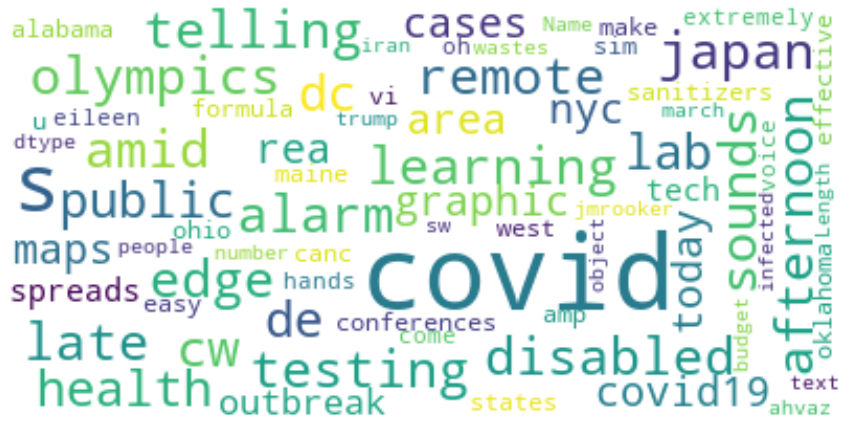

In [7]:
helpers.generate_wordcloud(df_03_07_words['text'])

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = blob.sentiment.polarity
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'negative'
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

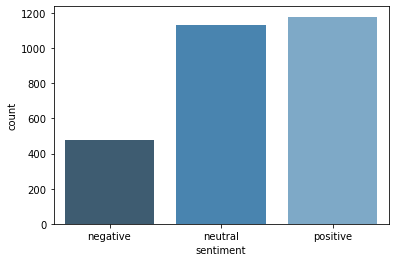

In [8]:
df_03_07_words = helpers.sentiment_analysis(df_03_07_words)
sns.countplot(x='sentiment', data = df_03_07_words, palette='Blues_d')

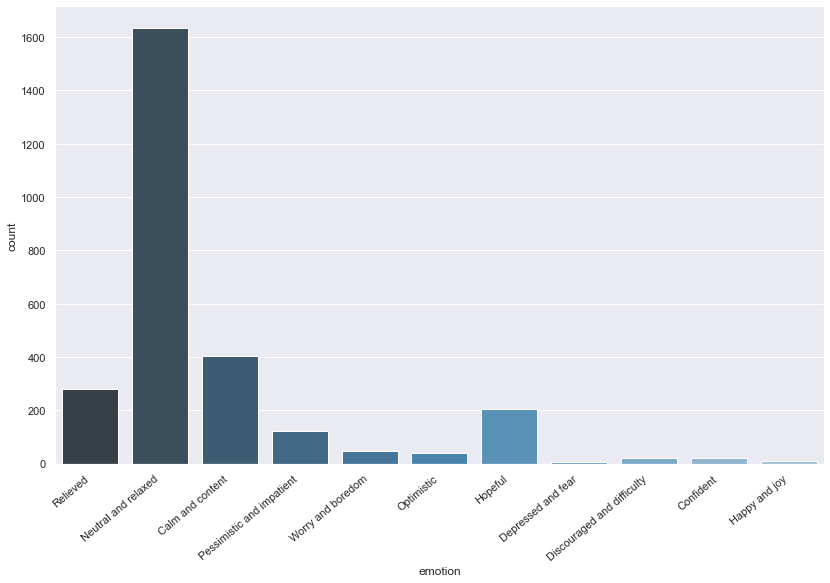

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

df_03_07_words = helpers.generate_emotion(df_03_07_words)
ax = sns.countplot(x='emotion', data = df_03_07_words, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

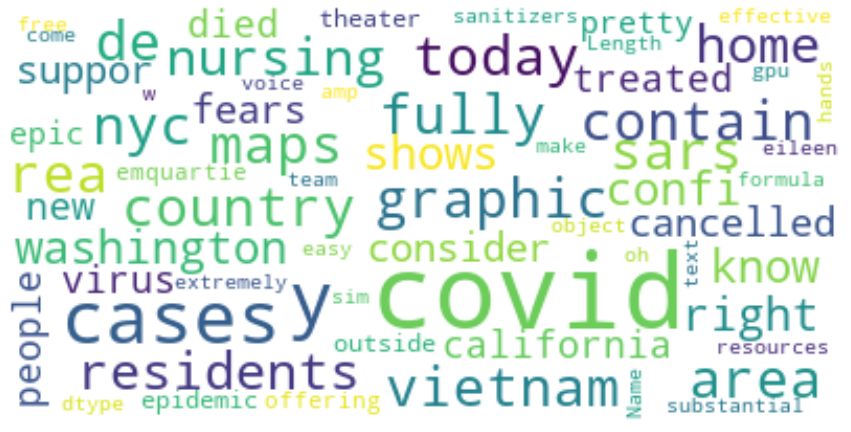

In [13]:
helpers.generate_wordcloud(df_03_07_words['text'][df_03_07_words['sentiment'] == 'positive'])

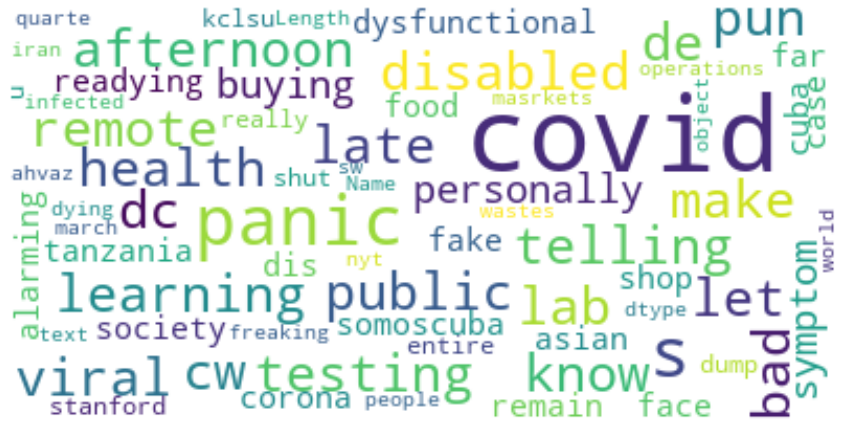

In [14]:
helpers.generate_wordcloud(df_03_07_words['text'][df_03_07_words['sentiment'] == 'negative'])

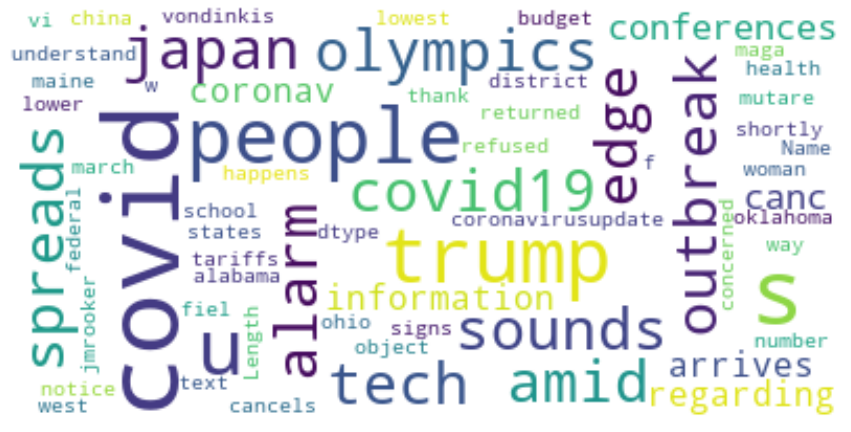

In [15]:
helpers.generate_wordcloud(df_03_07_words['text'][df_03_07_words['sentiment'] == 'neutral'])

In [16]:
helpers.print_top_five(df_03_07[df_03_07_words['sentiment'] == 'positive'], 'favorite_count')

Top 5 favorite_count

favorite_count: 1183.0
evolving covid 19 situation strongly encouraging salesforce employees california washington work home month march order protect health amp safety employees communities entire ohana

favorite_count: 277.0
documentary series pandemic netflix filmed explosion covid 19 provides extensive education respiratory infectious diseases spread watch 2 particular shows infected person set epidemic

favorite_count: 248.0
0 n science engineering twitter far uvc 222nm lighting potential rapid retrofittable cheap effective human safe multi situation deployment stop spread covid 19 questions order figure applicability goes

favorite_count: 245.0
breaking dc presumptive positive covid 19 case reported city mayorbowser set news conference 7 30pm address wusa9

favorite_count: 186.0
pence makes sense far pence s strategy covid 19 entailed mix inter agency meetings personnel moves pr


## March 13
### President Donald Trump declares the novel coronavirus a national emergency

In [17]:
df_03_13 = pd.read_csv('data/2020_03_13.csv')
df_03_13.head()

user_location  user_followers retweet_count  favorite_count user_verified  \
0      Brasília          1718.0         22085             0.0         False   
1           NaN          2210.0            27             0.0         False   
2   Puerto Rico          1151.0         58863             0.0         False   
3   Belém, Pará          3920.0          9533             0.0         False   
4           NaN           249.0         42495             0.0         False   

                  date lang  \
0  2020-03-13 02:24:41   pt   
1  2020-03-13 05:54:16   en   
2  2020-03-13 18:30:34   en   
3  2020-03-13 17:15:15   pt   
4  2020-03-13 14:28:45   en   

                                                text  \
0  RT @baianolol1: Para evitar a transmissão do c...   
1  RT @chhuti_is: I so miss UPA 1. I would do any...   
2  RT @GhaydaaSamaan: Earth is taking a break, a ...   
3  RT @OskarSays: BOLSONARO DEU negativo para cov...   
4  RT @SOUTHSKTH: reminder that there are actual ...   

                                      hashtags              source  
0                                          NaN  Twitter for iPhone  
1        ['BlackFriday', 'Covid_19', 'Sensex']     Twitter Web App  
2  ['CoronaVirusUpdate', 'Covid_19', 'كورونا']  Twitter for iPhone  
3                                          NaN  Twitter for iPhone  
4                                          NaN  Twitter for iPhone

In [18]:
df_03_13 = helpers.preprocess_dataframe(df_03_13)

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()


In [19]:
helpers.print_top_five(df_03_13, 'favorite_count')

Top 5 favorite_count

favorite_count: 2522.0
breaking news the dallas cowboys have announced they will not be participating in the nfl playoffs this upcoming season due to covid 19

favorite_count: 1900.0
chinese billionaire steps in to donate covid 19 testing kits and masks to the us which still seems incapable of testing patients despite months of advance warning that this crisis was coming

favorite_count: 694.0
updated odds of catching covid 19 mar 1 in 4600 apr 1 in 140 may 1 in 5 jun 1 in 2 jul 1 in 12 aug 1 in 150 assumes continue current trajectory without radical interventions hopefully this gives context to govt comments about timing interventions right

favorite_count: 492.0
covid 19 very contagious and 6 times as lethal as flu worse if old smoker diabetic obese or heart disease we will see exponential spread slow spread to reduce unnecessary deaths isolate hygiene sleep well eat well exercise sunshine

favorite_count: 356.0
army s donated 500k to covid efforts after cancell

In [20]:
helpers.print_top_five(df_03_13, 'retweet_count')

Top 5 retweet_count

retweet_count: 999
discrimination is illegal in new york city if you experience or see any sort of hate crime or discrimination related to co

retweet_count: 997
uploading now urgently will check back in an hour if i haven t been arrested still pulled over as i type roxhamroad

retweet_count: 996
i shared my story on the importance of self quarantine and my 14 days experience of self isolation but dailynation wen

retweet_count: 990
as a precautionary measure against the spread of covid 19 novel coronavirus the rashtrapati bhavan will remain closed

retweet_count: 99
today repdwstweets asked cdcgov s dr redfield who s in charge of covid testing he couldn t answer he then looke


In [21]:
df_03_13_words = df_03_13
#Removing Stop Words
df_03_13_words['text'] = df_03_13['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in ENGLISH_STOP_WORDS]))

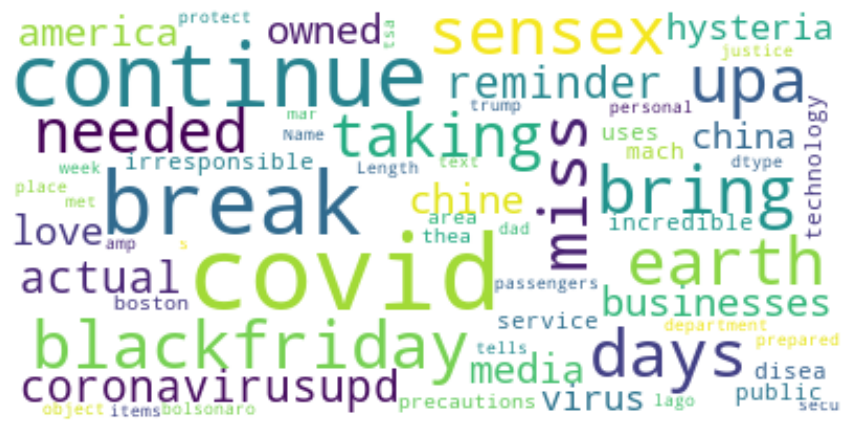

In [22]:
helpers.generate_wordcloud(df_03_13_words['text'])

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = blob.sentiment.polarity
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'neutral'
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

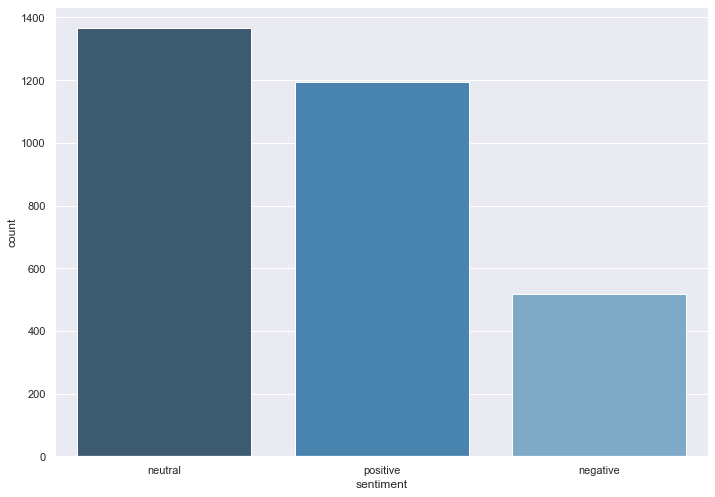

In [23]:
df_03_13_words = helpers.sentiment_analysis(df_03_13_words)
sns.countplot(x='sentiment', data = df_03_13_words, palette='Blues_d')

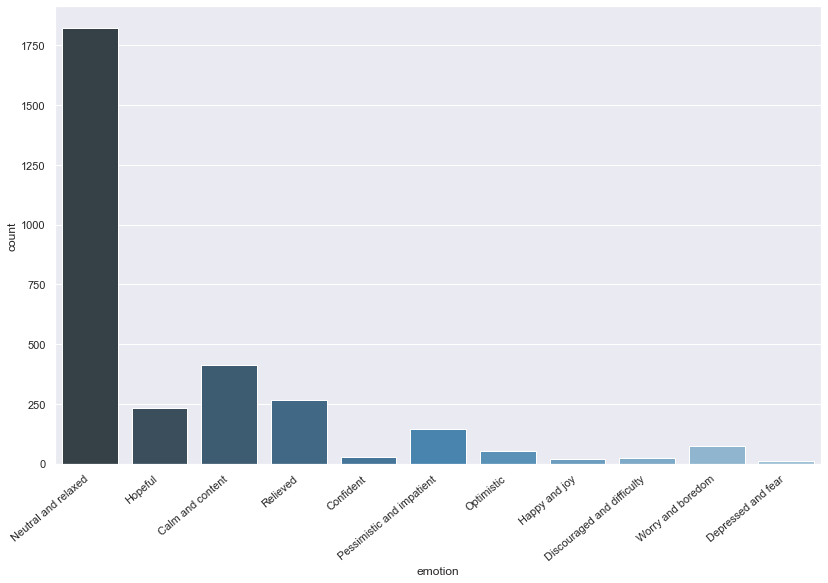

In [25]:
df_03_13_words = helpers.generate_emotion(df_03_13_words)
ax = sns.countplot(x='emotion', data = df_03_13_words, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

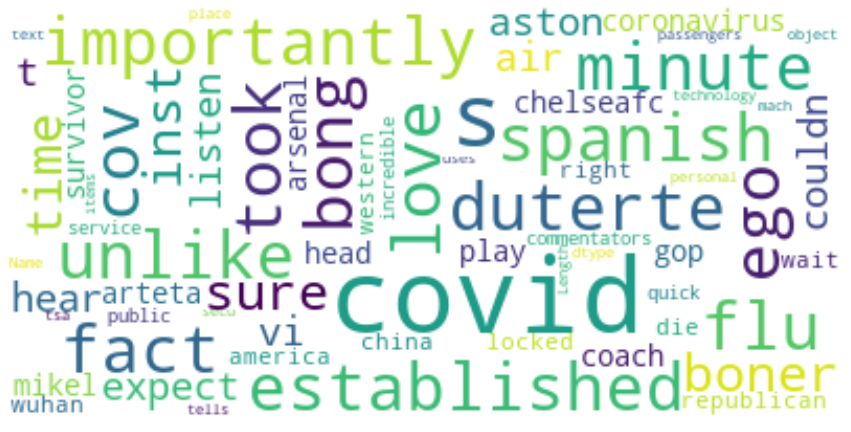

In [26]:
helpers.generate_wordcloud(df_03_13_words['text'][df_03_13_words['sentiment'] == 'positive'])

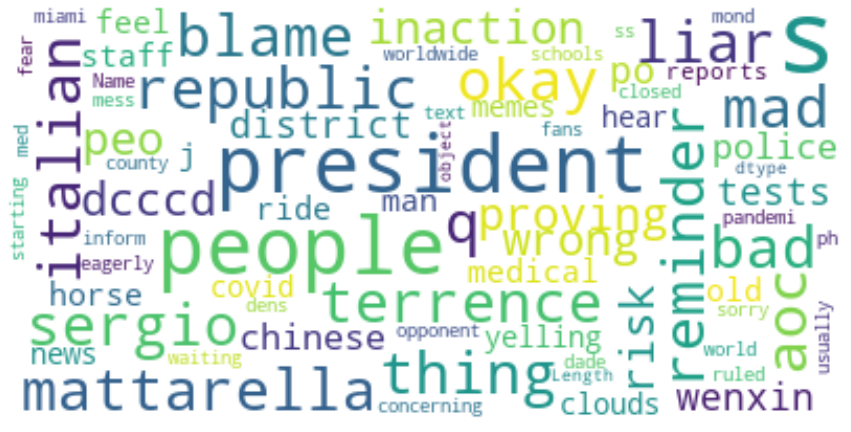

In [27]:
helpers.generate_wordcloud(df_03_13_words['text'][df_03_13_words['sentiment'] == 'negative'])

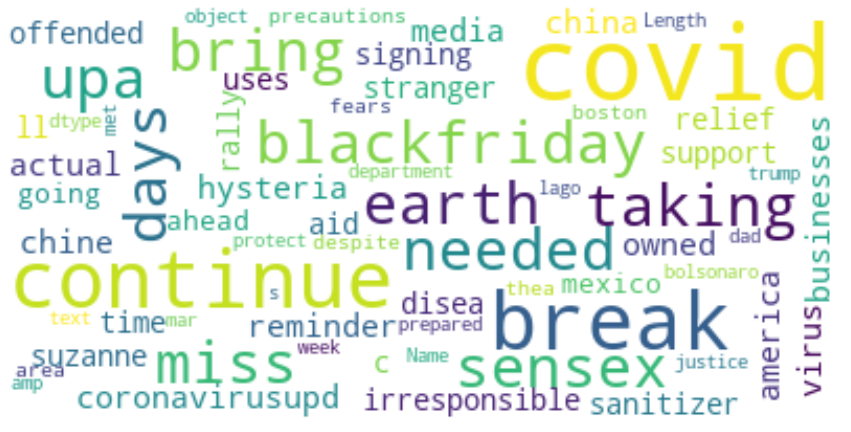

In [28]:
helpers.generate_wordcloud(df_03_13_words['text'][df_03_13_words['sentiment'] == 'neutral'])

In [29]:
helpers.print_top_five(df_03_13[df_03_13_words['sentiment'] == 'positive'], 'favorite_count')

Top 5 favorite_count

favorite_count: 694.0
updated odds catching covid 19 mar 1 4600 apr 1 140 1 5 jun 1 2 jul 1 12 aug 1 150 assumes continue current trajectory radical interventions hopefully gives context govt comments timing interventions right

favorite_count: 207.0
javialejandro21 thedailybeast layoffs folks bailout italy just requested 28 billion deal covid 19 dotus wants 8 billion bail wall street 1 trillion thought opposed socialism

favorite_count: 202.0
tune come eileen covid 19 oh hands clean m home self quarantiiiine

favorite_count: 177.0
today ran situ simulation collingwoodhosp ed refine covid intubation protocol lessons thread 1 donning doffing takes practice familiarize ppe takes coach written checklist safely stressed

favorite_count: 166.0
update covid 19 dashboard running thanks patience


## May 18
### The world was about to pass the 5 million active cases and more than 300,000 deaths.

In [30]:
df_05_18 = pd.read_csv('data/2020_05_18.csv')
df_05_18.head()

user_location  user_followers  retweet_count  \
0                             NaN             324          10169   
1                      México. 🇲🇽             159              1   
2  New Delhi/Washington DC/London            1000          10043   
3                   Paris, France            1420              3   
4                 Westchester, NY            2307           2179   

   favorite_count  user_verified                 date lang  \
0               0          False  2020-05-18 18:57:55   en   
1               0          False  2020-05-18 03:15:39   es   
2               0          False  2020-05-18 18:08:24   en   
3               0          False  2020-05-18 20:02:45   fr   
4               0          False  2020-05-18 17:04:57   en   

                                                text          hashtags  \
0  RT @encouragingRD: your summer body is the one...               NaN   
1  En tiempos de covid- 19 \n😬😅😂😂😂\n\n#PobreKiwi ...     ['PobreKiwi']   
2  RT @SBSNews: India, Japan, Britain, Canada, Ne...               NaN   
3  RT @DrRahali_CybPsy: Ravie que mon Application...  ['CORONAPHOBIA']   
4  RT @NoahShachtman: EXCLUSIVE: A military contr...               NaN   

                source  
0      Twitter Web App  
1   Twitter for iPhone  
2  Twitter for Android  
3      Twitter Web App  
4     Twitter for iPad

In [31]:
df_05_18 = helpers.preprocess_dataframe(df_05_18)

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()


In [32]:
helpers.print_top_five(df_05_18, 'favorite_count')

Top 5 favorite_count

favorite_count: 664
success in battle against covid will be determined by lives saved and not total cases 1 3bn indians yet covid deaths mn is just 2 against 511 in spain mortality rate is 3 against 16 in france these rates are among the lowest in the world we must set an example for the world

favorite_count: 618
starting today you can check out guides a new way to discover recommendations on instagram we know people are struggling due to covid 19 so the first guides focus on wellness content from respected organizations and creators find out more

favorite_count: 599
aw i woke up to everyone telling me charli said i m funny shes a sweetheart charlidamelio we better hang after covid runs through

favorite_count: 353
italy unlocks italy covid 19

favorite_count: 344
after zomato swiggy announces 1 100 layoffs 14 of staff


In [33]:
helpers.print_top_five(df_05_18, 'retweet_count')

Top 5 retweet_count

retweet_count: 115942
i still can t get over how americans got tired of covid and just decided it was over

retweet_count: 75828
i can hear the djs now if you survived covid 19 make some mf n noise

retweet_count: 68881
as the world confronts the covid 19 pandemic and the challenges to healthcare systems and the global economy we convene th

retweet_count: 48797
not wearing a mask is a sign of your privilege it means that even in a pandemic with thousands of people dying you ha

retweet_count: 34160
how are people deadass out partying do you have parents are you immune to covid orrr do your parents straight up don


In [34]:
df_05_18_words = df_05_18
#Removing Stop Words
df_05_18_words['text'] = df_05_18['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in ENGLISH_STOP_WORDS]))

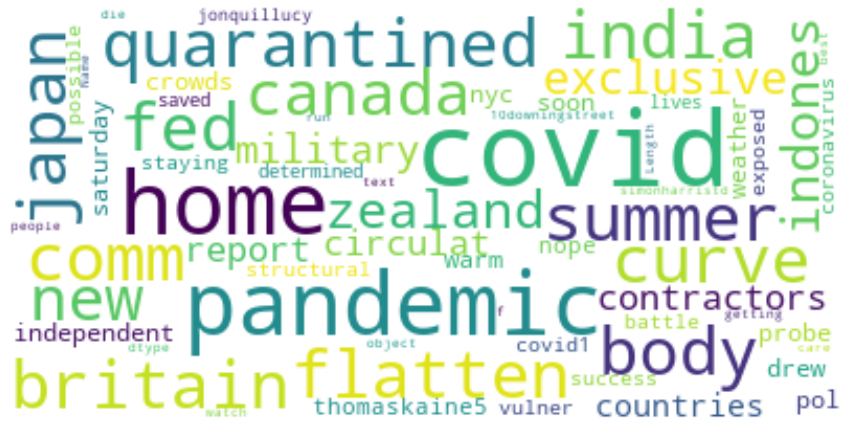

In [35]:
helpers.generate_wordcloud(df_05_18_words['text'])

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = blob.sentiment.polarity
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'neutral'
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

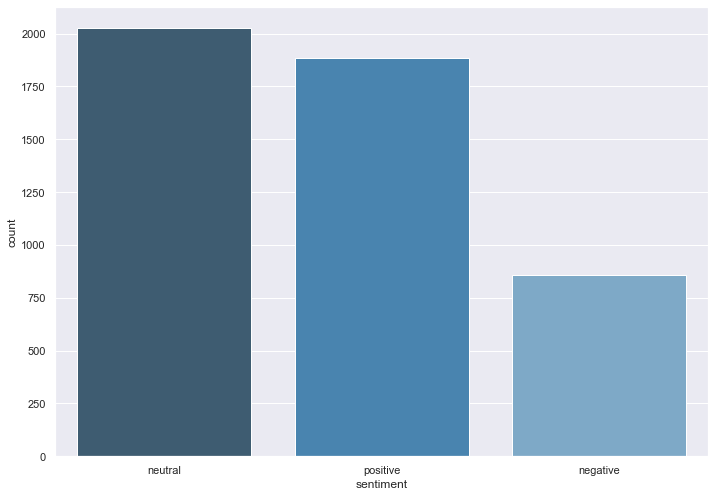

In [36]:
df_05_18_words = helpers.sentiment_analysis(df_05_18_words)
sns.countplot(x='sentiment', data = df_05_18_words, palette='Blues_d')

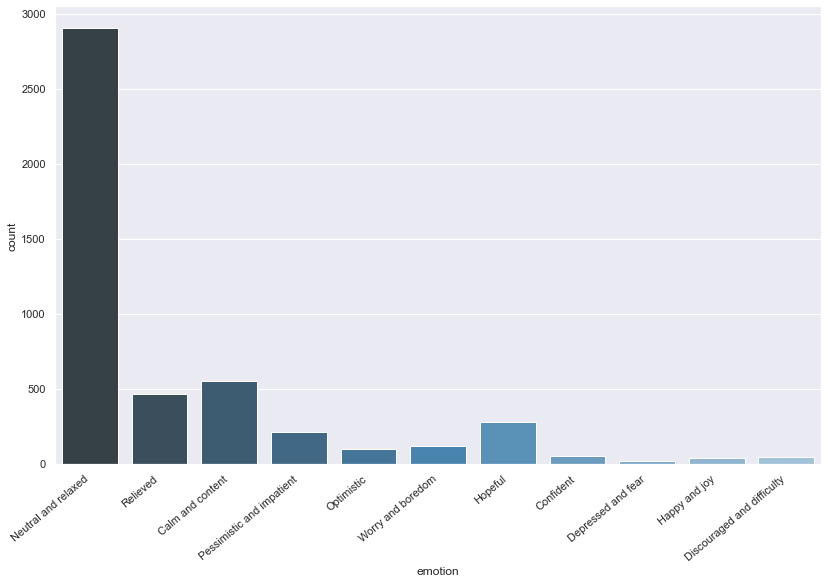

In [38]:
df_05_18_words = helpers.generate_emotion(df_05_18_words)
ax = sns.countplot(x='emotion', data = df_05_18_words, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

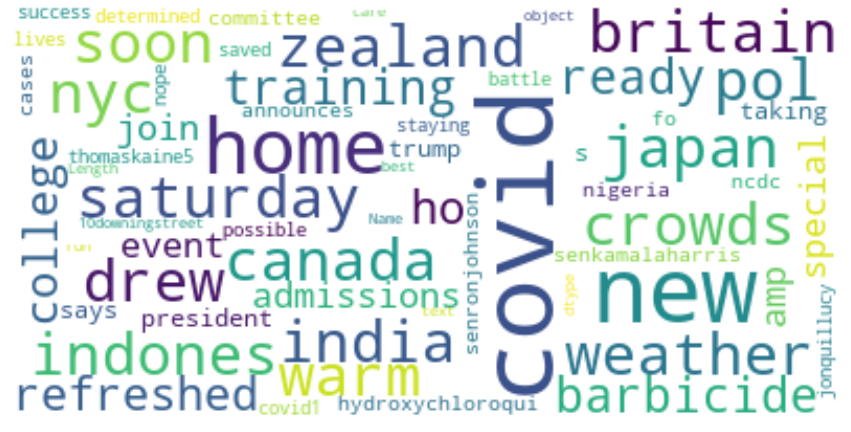

In [39]:
helpers.generate_wordcloud(df_05_18_words['text'][df_05_18_words['sentiment'] == 'positive'])

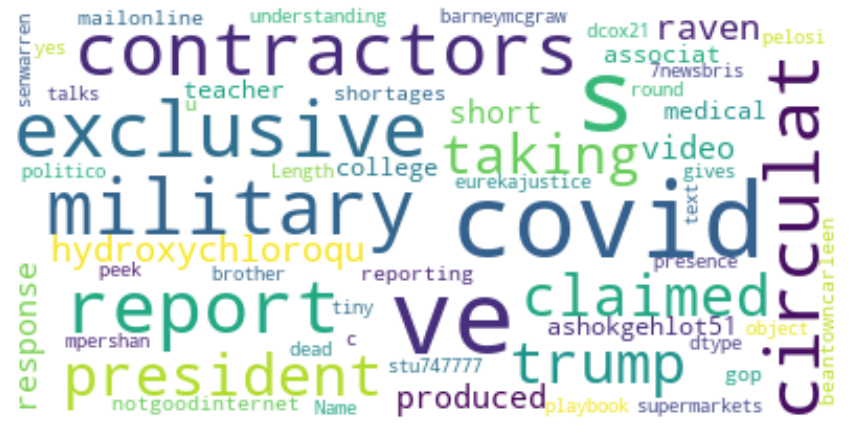

In [40]:
helpers.generate_wordcloud(df_05_18_words['text'][df_05_18_words['sentiment'] == 'negative'])

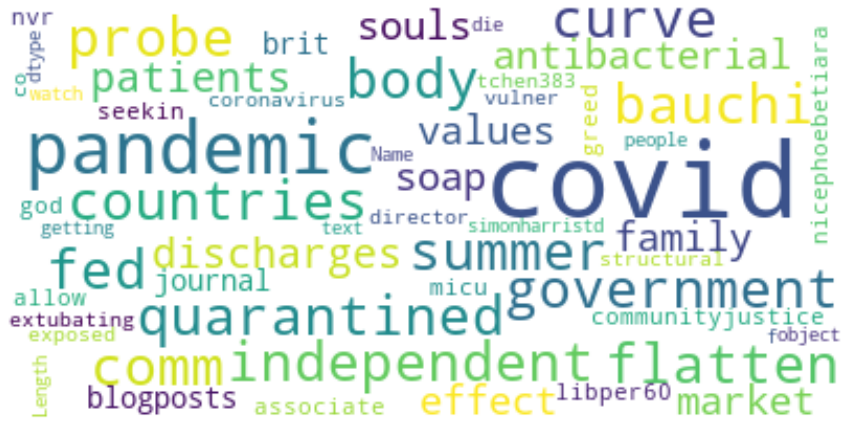

In [41]:
helpers.generate_wordcloud(df_05_18_words['text'][df_05_18_words['sentiment'] == 'neutral'])

In [42]:
helpers.print_top_five(df_05_18[df_05_18_words['sentiment'] == 'negative'], 'favorite_count')

Top 5 favorite_count

favorite_count: 152
trump s incompetence created tragic mess end 1 000 2 000 die covid 19 daily coordinated consistent effort country kids idea school fear getting sick

favorite_count: 148
total 67 cops including sp rank officer tested covid positive anantnag far aggressive testing taking place

favorite_count: 88
issue cleared sm bighit fantagio pledis issued statement regarding apologized behalf jaehyun jungkook eun woo mingyu ve tested covid 19 came negative dispatch leave 97 liners

favorite_count: 71
looking understand early impacts covid19 food systems document series summarise rapid assessments undertaken gainalliance focus small medium sized enterprises smes foodsystem read

favorite_count: 63
fake ventilators leave gujarat model gasping breath famed gujarat amp economical ventilators inaugurated cm turns fake happened insane ahmedabad guinea pigs covid 19 ahmedabadmirror


## May 28

In [43]:
df_05_28 = pd.read_csv('data/2020_05_28.csv')
df_05_28.head()

user_location  user_followers  retweet_count  favorite_count  \
0  England, United Kingdom               1              0               0   
1            Mumbai, India             642             50               0   
2                   Sydney            8952              2               0   
3   Bogotá, D.C., Colombia              86             34               0   
4                   Canada            1604            764               0   

   user_verified                 date lang  \
0          False  2020-05-28 11:40:26   en   
1          False  2020-05-28 14:40:33   en   
2          False  2020-05-28 00:02:59   en   
3          False  2020-05-28 02:31:58   es   
4          False  2020-05-28 21:39:37   en   

                                                text         hashtags  \
0  @SteveSpeirs4 @rickygervais Stay strong mate.....              NaN   
1  RT @RangDeTiranga: What if #SambitPatra is fak...  ['SambitPatra']   
2  RT @legalvision_au: Join us 1pm AEST today and...              NaN   
3  RT @felipeangell: Esta es una de las gráficas ...              NaN   
4  RT @JoyceWhiteVance: Alabama's League of Women...              NaN   

                source  
0   Twitter for iPhone  
1   Twitter for iPhone  
2   Twitter for iPhone  
3  Twitter for Android  
4     Twitter for iPad

In [44]:
df_05_28 = helpers.preprocess_dataframe(df_05_28)

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()


In [45]:
helpers.print_top_five(df_05_28, 'favorite_count')

Top 5 favorite_count

favorite_count: 814
updated this abolition resource guide with sections on covid and on mutual aid including some of the incredible recent webinars

favorite_count: 240
hoodie milly djwalt breepapas covid 19 racism capitalism makes us all forget about the real real virus in the world america

favorite_count: 203
breaking the superannuation system regulator apra has just confirmed to the senate covid committee that further evidence of fraud has been identified in relation to the government s early access to super scheme auspol

favorite_count: 182
fantastic news today that the total number of active cases of covid 19 in new zealand has come down to just eight we are so close to eliminating the virus from within new zealand

favorite_count: 169
this also comes one day after four more covid 19 tests on premier league players and staff came back positive


In [46]:
helpers.print_top_five(df_05_28, 'retweet_count')

Top 5 retweet_count

retweet_count: 186391
genovia hasn t reported a single case of covid 19 this is what true leadership looks like

retweet_count: 81142
dotty remember when the covid protestors had guns and the police did nothing to them yeah me too

retweet_count: 69744
i m moving 1b of my square equity 28 of my wealth to startsmall llc to fund global covid 19 relief after we disarm this pa

retweet_count: 68879
as the world confronts the covid 19 pandemic and the challenges to healthcare systems and the global economy we convene th

retweet_count: 53029
covid 19 almost made me forget about the real virus in america


In [47]:
df_05_28_words = df_05_28
#Removing Stop Words
df_05_28_words['text'] = df_05_28['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in ENGLISH_STOP_WORDS]))

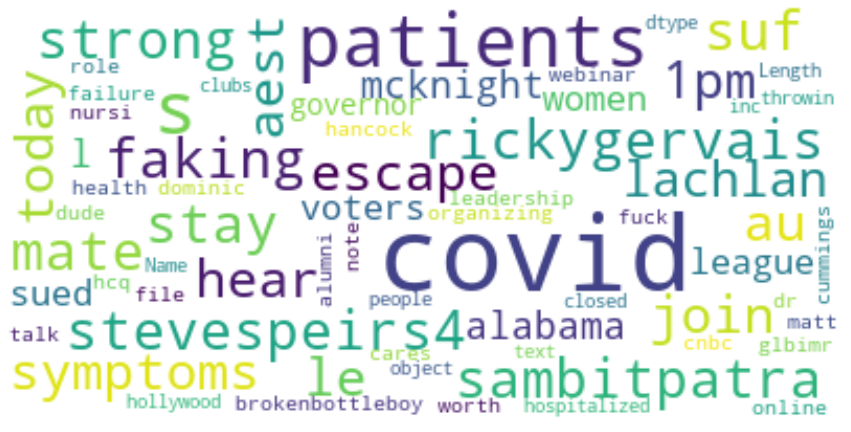

In [48]:
helpers.generate_wordcloud(df_05_28_words['text'])

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = blob.sentiment.polarity
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'positive'
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

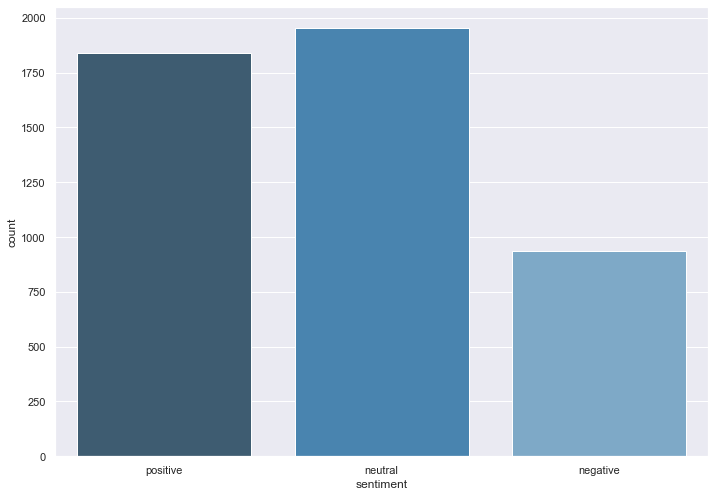

In [49]:
df_05_28_words = helpers.sentiment_analysis(df_05_28_words)
sns.countplot(x='sentiment', data = df_05_28_words, palette='Blues_d')

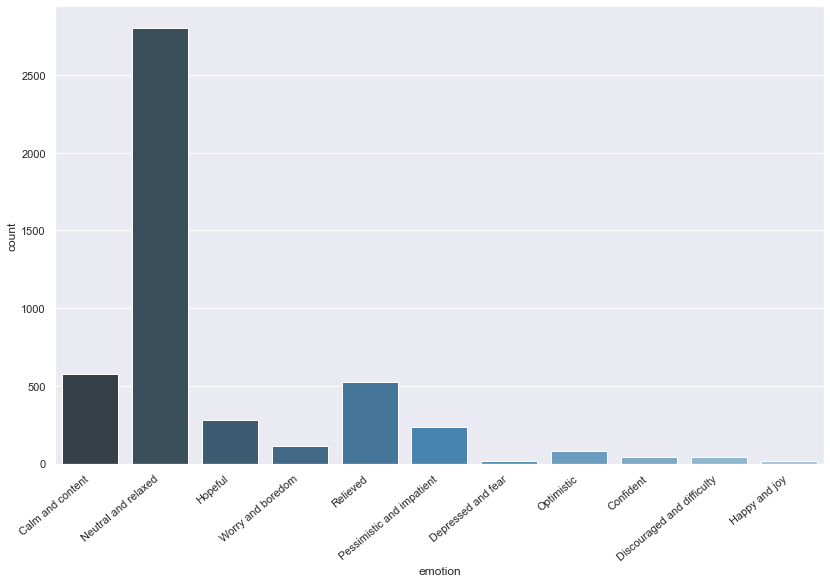

In [51]:
df_05_28_words = helpers.generate_emotion(df_05_28_words)
ax = sns.countplot(x='emotion', data = df_05_28_words, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## July 6

In [52]:
df_07_06 = pd.read_csv('data/2020_07_06.csv')
df_07_06.head()

user_location  user_followers  retweet_count  \
0                            NaN              57           9587   
1  makassar, semarang, indonesia             735           2130   
2                            NaN             292           4295   
3                  New York, USA             449              0   
4                    Phoenix, AZ            2042              7   

   favorite_count  user_verified                 date lang  \
0               0          False  2020-07-06 03:07:12   en   
1               0          False  2020-07-06 04:13:31   in   
2               0          False  2020-07-06 19:34:34   en   
3               0          False  2020-07-06 01:19:53   en   
4               0          False  2020-07-06 04:20:59   en   

                                                text hashtags  \
0  RT @EM_RESUS: Do you personally know someone w...      NaN   
1  RT @Ladrinaline: Beberapa waktu ini bertanya2 ...      NaN   
2  RT @maddow: "It took three months, from early ...      NaN   
3  Netanyahu sounds alarm over Israel’s new Covid...      NaN   
4  RT @theleorodriguez: COVID update on my apa:\n...      NaN   

                source  
0  Twitter for Android  
1  Twitter for Android  
2  Twitter for Android  
3  Twitter for Android  
4   Twitter for iPhone

In [53]:
df_07_06 = helpers.preprocess_dataframe(df_07_06)

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()


In [54]:
helpers.print_top_five(df_07_06, 'favorite_count')

Top 5 favorite_count

favorite_count: 8613
broadway actor nick cordero who had admirers across the world rallying for his recovery dies at 41 after a battle with covid 19

favorite_count: 4617
so borisjohnson just reneged on providing daily figures of people tested for covid too difficult he says too difficult caring for covid icu patients in full ppe is difficult telling someone they are dying from covid is difficult this this is just plain old claptrap

favorite_count: 596
at afghanistan strengthening consensus for peace meeting afghan president ashraf ghani thanked pm modi for covid assistance amp providing regional leadership india reiterated importance of inclusive afghan led afghan owned afghan controlled peace amp reconciliation process mea

favorite_count: 500
yesterday the percent of arizona s covid 19 cases that are hospitalized fell again to 5 11 on june 11 this number was at 11 00 yesterday the total mortality rate in arizona fell again to 1 78 on june 1 this number was at 

In [55]:
helpers.print_top_five(df_07_06, 'retweet_count')

Top 5 retweet_count

retweet_count: 243832
i don t think anything i ve seen so perfectly captures why there s no way the us is going to be getting on top of covid

retweet_count: 156171
what covid and racism have in common people don t believe they exists if they haven t been affected personally

retweet_count: 144591
y all couldn t impose a curfew no real strict stay at home order for corona but y all was speedy with this eight pm curfe

retweet_count: 124097
i m sorry but covid has really made me judge some of my friends why y all can t stay in the house why y all can t wear

retweet_count: 122585
so baseball players will get tested for covid 19 every two days how often will teachers and students be tested


In [56]:
df_07_06_words = df_07_06
#Removing Stop Words
df_07_06_words['text'] = df_07_06['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in ENGLISH_STOP_WORDS]))

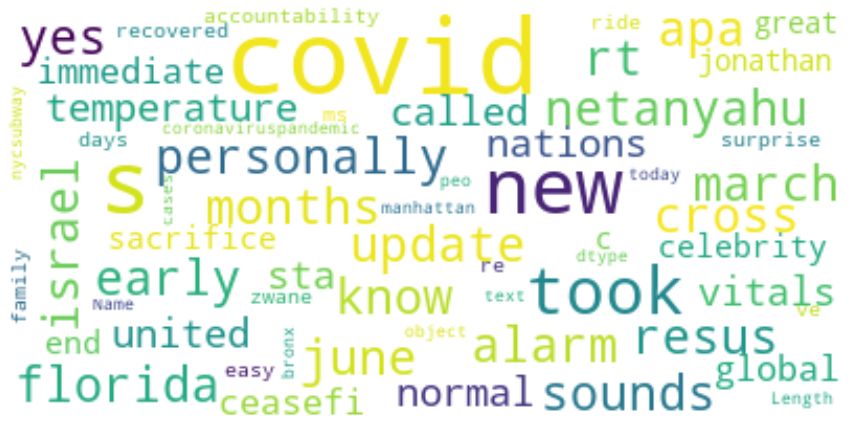

In [57]:
helpers.generate_wordcloud(df_07_06_words['text'])

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = blob.sentiment.polarity
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'neutral'
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

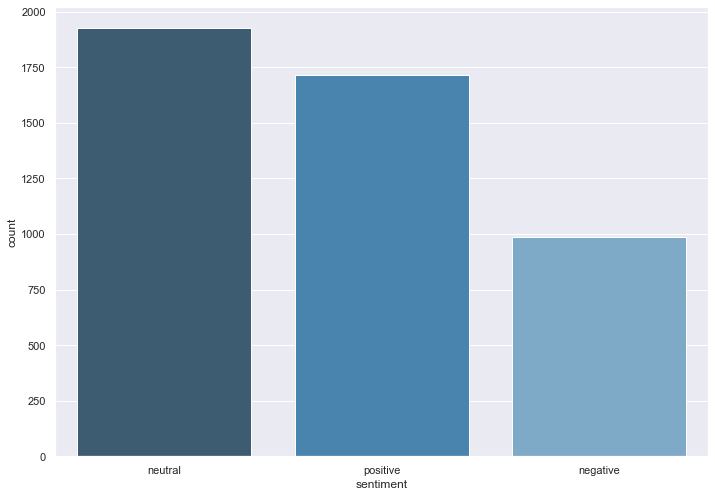

In [58]:
df_07_06_words = helpers.sentiment_analysis(df_07_06_words)
sns.countplot(x='sentiment', data = df_07_06_words, palette='Blues_d')

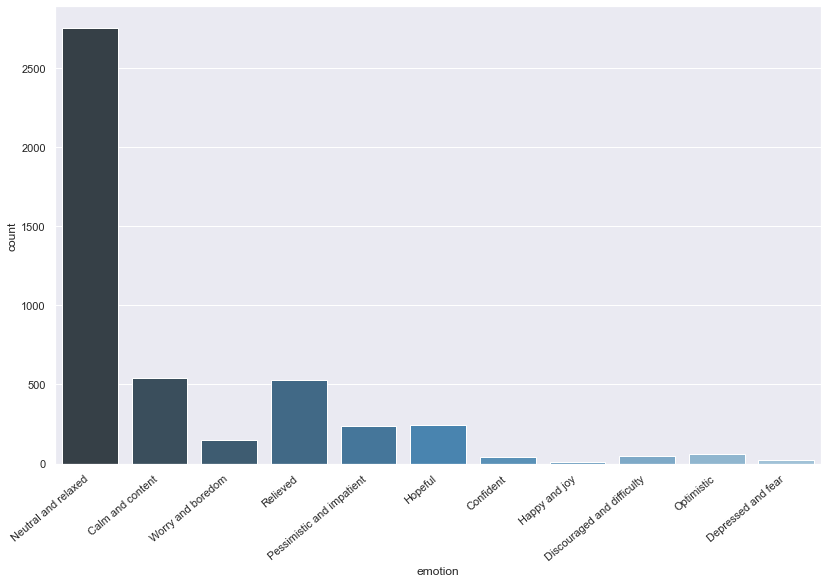

In [60]:
df_07_06_words = helpers.generate_emotion(df_07_06_words)
ax = sns.countplot(x='emotion', data = df_07_06_words, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

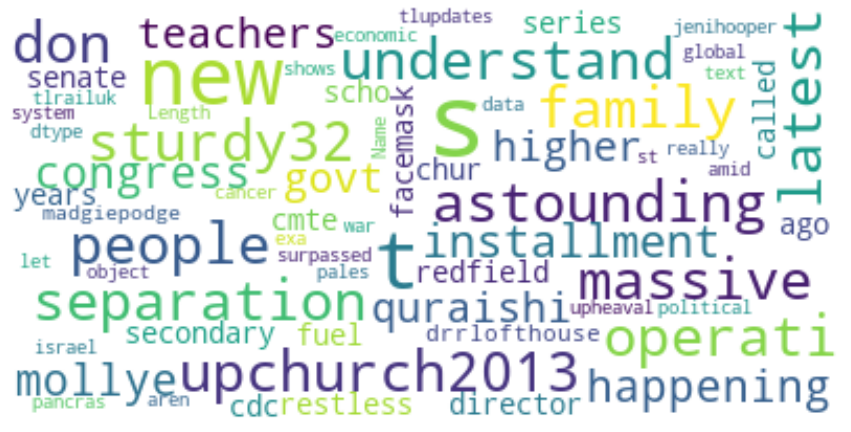

In [91]:
helpers.generate_wordcloud(df_09_16_words['text'][df_09_16_words['sentiment'] == 'positive'])

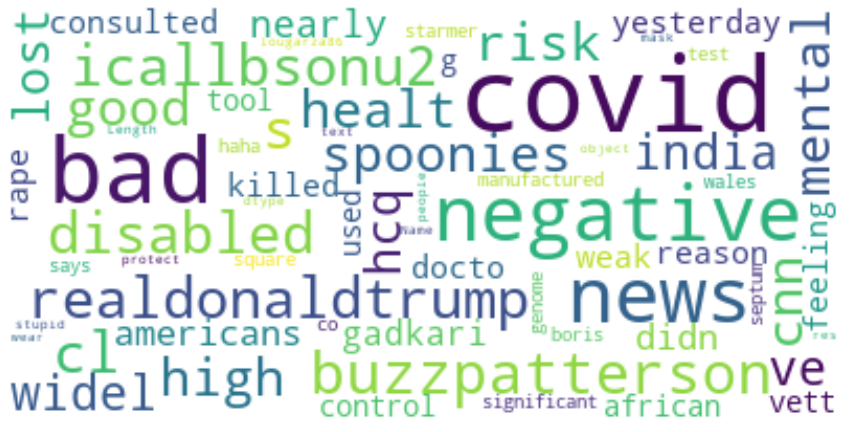

In [92]:
helpers.generate_wordcloud(df_09_16_words['text'][df_09_16_words['sentiment'] == 'negative'])

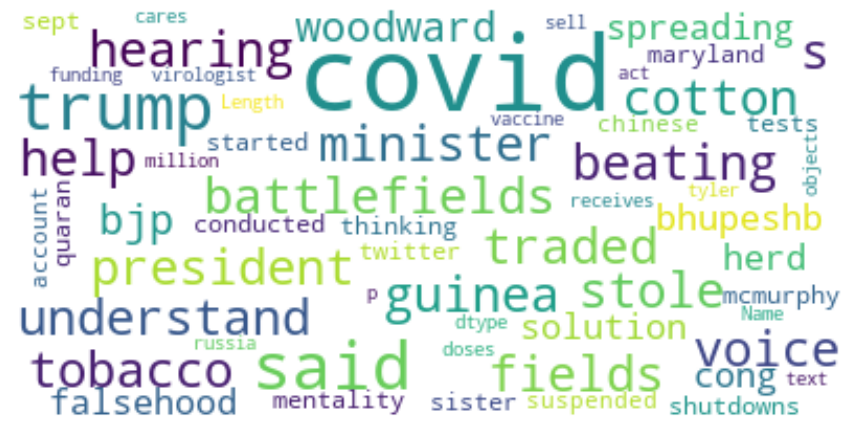

In [93]:
helpers.generate_wordcloud(df_09_16_words['text'][df_09_16_words['sentiment'] == 'neutral'])

## July 21

In [61]:
df_07_21 = pd.read_csv('data/2020_07_21.csv')
df_07_21.head()

user_location  user_followers  retweet_count  favorite_count  \
0    Islamabad, Pakistan             378             38               0   
1           Planet Earth            1957              0               2   
2       Ciudad de México             300            159               0   
3            Panama city             327              0               0   
4  Paso de los Toros, UY            2726            104               0   

   user_verified                 date lang  \
0          False  2020-07-21 18:24:31   en   
1          False  2020-07-21 23:35:03   en   
2          False  2020-07-21 04:38:14   es   
3          False  2020-07-21 23:56:20   es   
4          False  2020-07-21 09:57:51   en   

                                                text hashtags  \
0  RT @SumaiyaMalik550: We are worried about our ...      NaN   
1  @DianaGeorgina15 And Trump wants to cut payrol...      NaN   
2  RT @c4jimenez: LLEVAN MESES "ENFERMOS"\nHace c...      NaN   
3  @elcuaracom Esas muertes por coronavirus a mi ...      NaN   
4  RT @Reuters: Possible but not certain COVID-19...      NaN   

                source  
0  Twitter for Android  
1      Twitter Web App  
2  Twitter for Android  
3  Twitter for Android  
4      Twitter Web App

In [62]:
df_07_21 = helpers.preprocess_dataframe(df_07_21)

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()


In [63]:
helpers.print_top_five(df_07_21, 'favorite_count')

Top 5 favorite_count

favorite_count: 12185
so far at the covid inspired briefing potus has corrected his press secretary about how often he s tested and offered well wishes to jeffrey epstein s criminally charged ex girlfriend

favorite_count: 1305
the trump administration is not waging war on covid 19 the trump administration is waging war on science

favorite_count: 1028
covid exclusive facilities are relieving pressure on both long term care facilities amp hospitals florida now has 20 of these facilities operational with 5 more pending ultimately this will amount to nearly 1 700 beds

favorite_count: 781
there were sharp declines in the rate if new covid 19 cases yesterday and that drove the market more than vaccine news all vaccine stocks as well as airlines cruise ships and casinos got hit case counts plateauing will add fuel to rally

favorite_count: 716
i feel so burnt out problem with covid is it s hard to get a real meaningful rejuvenating vacation i d like to spend a week on

In [64]:
helpers.print_top_five(df_07_21, 'retweet_count')

Top 5 retweet_count

retweet_count: 222332
cracker this guy has now made a painting in which he is painting himself painting himself painting himself

retweet_count: 219080
please watch this especially if you ve tested positive for covid 19 and have recovered

retweet_count: 199818
rt valeriatapia today i learned that new zealand let health experts make the decisions about how to deal w the pandemic rather than pol

retweet_count: 147082
my older brother tested positive for covid i was in the same house as him he isolated in his office amp used a diff bathroo

retweet_count: 119394
i m sorry but after reading that donald trump is forcing hospitals to stop sending in covid 19 data to skew the numbers in


In [65]:
df_07_21_words = df_07_21
#Removing Stop Words
df_07_21_words['text'] = df_07_21['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in ENGLISH_STOP_WORDS]))

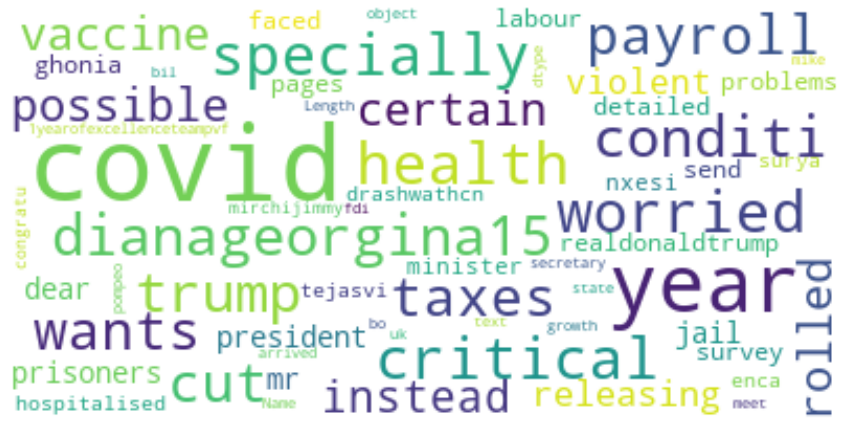

In [66]:
helpers.generate_wordcloud(df_07_21_words['text'])

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = blob.sentiment.polarity
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'positive'
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

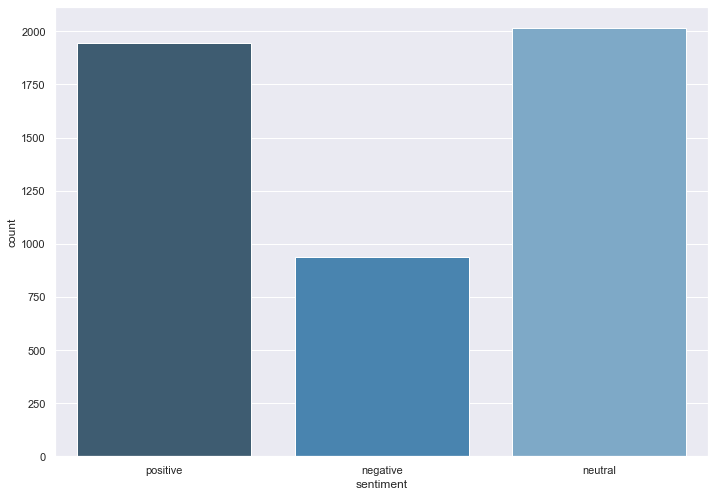

In [67]:
df_07_21_words = helpers.sentiment_analysis(df_07_21_words)
sns.countplot(x='sentiment', data = df_07_21_words, palette='Blues_d')

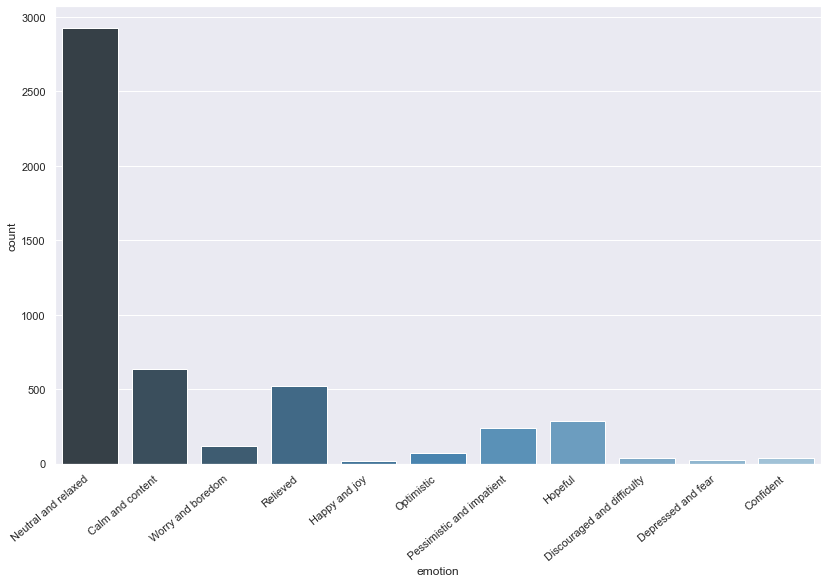

In [71]:
df_07_21_words = helpers.generate_emotion(df_07_21_words)
ax = sns.countplot(x='emotion', data = df_07_21_words, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

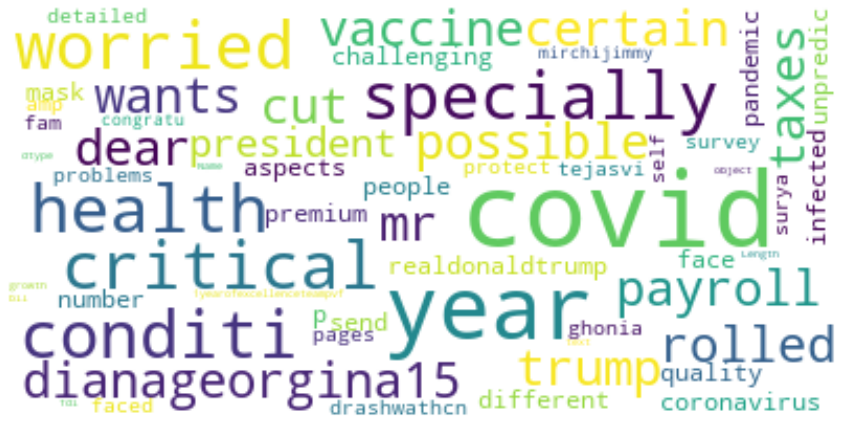

In [72]:
helpers.generate_wordcloud(df_07_21_words['text'][df_07_21_words['sentiment'] == 'positive'])

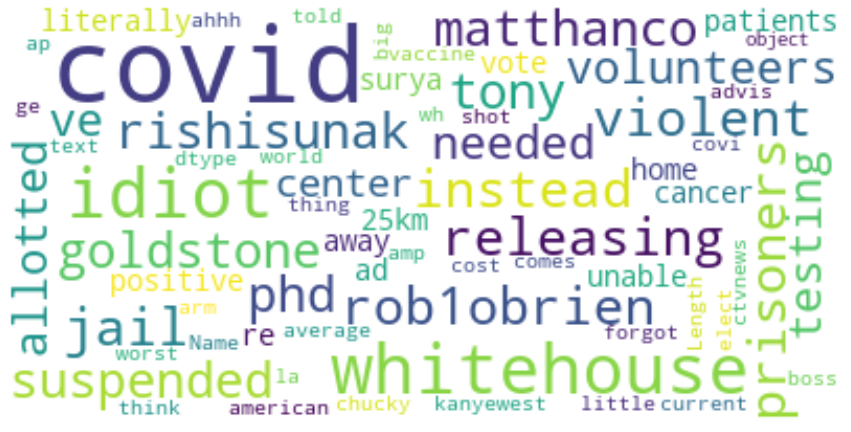

In [73]:
helpers.generate_wordcloud(df_07_21_words['text'][df_07_21_words['sentiment'] == 'negative'])

## September 16
### Trump Administration Releases Vaccine Distribution Plan

In [74]:
df_09_16 = pd.read_csv('data/2020_09_16.csv')
df_09_16.head()

user_location  user_followers  retweet_count  favorite_count  \
0               NaN             173           1004               0   
1               NaN              37              0               1   
2               NaN               6          47682               0   
3  Washington, D.C.           22238              0               0   
4               NaN            4729              2               0   

   user_verified                 date lang  \
0          False  2020-09-16 15:50:14   en   
1          False  2020-09-16 21:53:42   en   
2          False  2020-09-16 13:33:03   en   
3           True  2020-09-16 13:14:15   en   
4          False  2020-09-16 06:46:16   fr   

                                                text        hashtags  \
0  RT @CAFinUS: You traded cotton and tobacco fie...             NaN   
1  @Upchurch2013 @Sturdy32 I don’t understand whe...             NaN   
2  RT @AOC: It’s astounding that after a massive ...             NaN   
3  In the latest installment of What's Happening ...  ['coronvirus']   
4  RT @_daffyduke_: « Face à la #Covid_19, les Fr...    ['Covid_19']   

                source  
0   Twitter for iPhone  
1   Twitter for iPhone  
2  Twitter for Android  
3        Sprout Social  
4      Twitter Web App

In [75]:
df_09_16 = helpers.preprocess_dataframe(df_09_16)

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join(re.sub("(RT @[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['text'][i]).split()).lower()


In [76]:
df_09_16_words = df_09_16
#Removing Stop Words
df_09_16_words['text'] = df_09_16['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in ENGLISH_STOP_WORDS]))

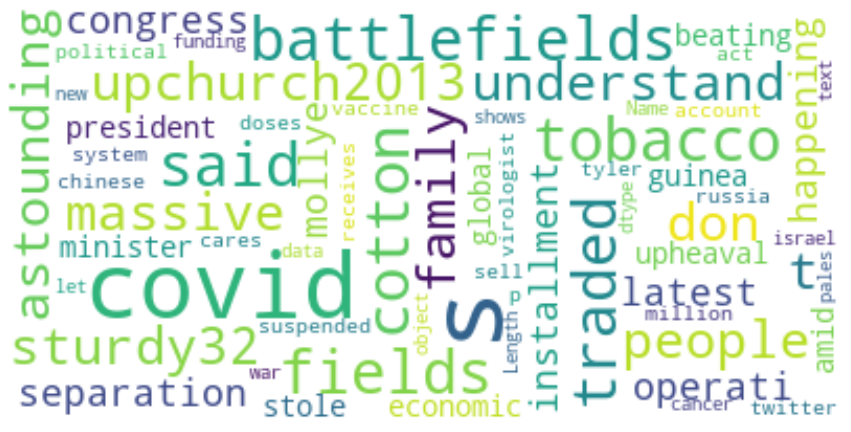

In [77]:
helpers.generate_wordcloud(df_09_16_words['text'])

/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = blob.sentiment.polarity
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i] = 'neutral'
/Users/salvadoralexisvirgenflores/Documents/Tec/Machine Learning/ProyectoFinal/tweets_helper_methods.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

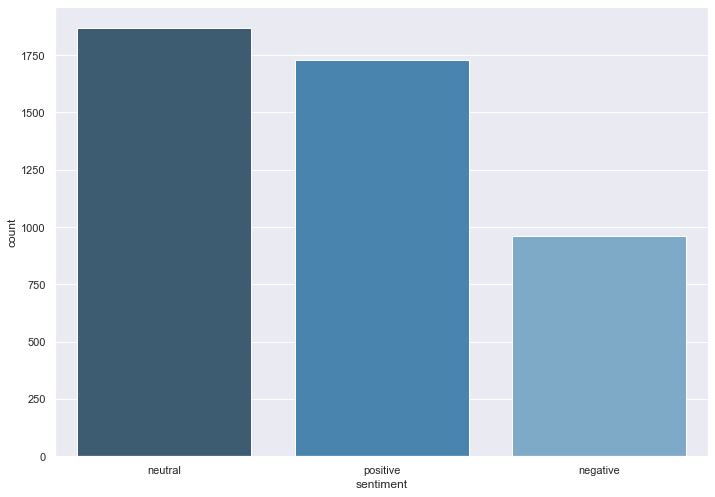

In [78]:
df_09_16_words = helpers.sentiment_analysis(df_09_16_words)
sns.countplot(x='sentiment', data = df_09_16_words, palette='Blues_d')

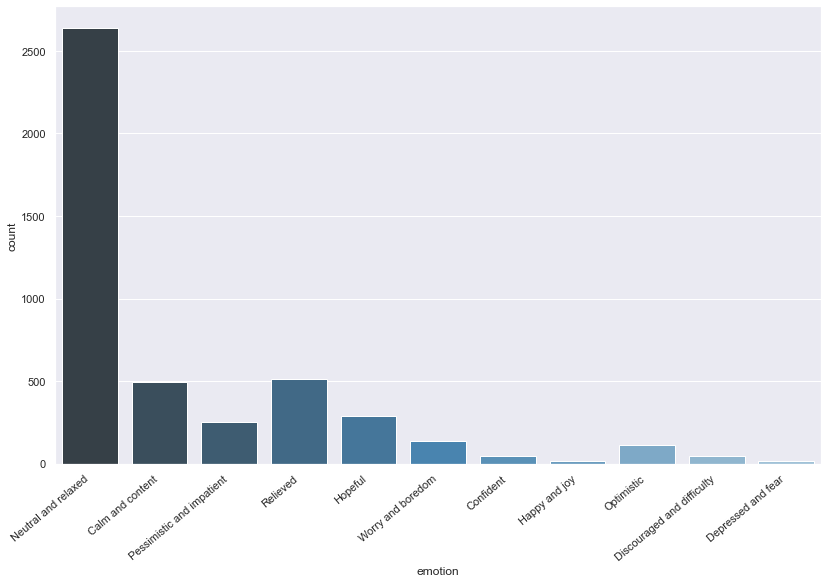

In [80]:
df_09_16_words = helpers.generate_emotion(df_09_16_words)
ax = sns.countplot(x='emotion', data = df_09_16_words, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [81]:
def print_sentiments(df):
    print(df['date'][0].split()[0])
    
    print('positive: '+ str(df['sentiment'].value_counts()[0]) + ' %' 
          + (str(df['sentiment'].value_counts()[0]/df.shape[0]*100)))
    print('neutral: '+ str(df['sentiment'].value_counts()[1]) + ' %' 
          + (str(df['sentiment'].value_counts()[1]/df.shape[0]*100)))
    print('negative: '+ str(df['sentiment'].value_counts()[2]) + ' %' 
          + (str(df['sentiment'].value_counts()[2]/df.shape[0]*100)))

In [82]:
print_sentiments(df_03_07)

2020-03-07
positive: 1179 %42.2883787661406
neutral: 1132 %40.6025824964132
negative: 477 %17.1090387374462


In [83]:
print_sentiments(df_03_13)

2020-03-13
positive: 1366 %44.36505358882754
neutral: 1194 %38.77882429360182
negative: 519 %16.856122117570642


In [84]:
print_sentiments(df_05_18)

2020-05-18
positive: 2026 %42.473794549266245
neutral: 1885 %39.517819706498955
negative: 859 %18.0083857442348


In [85]:
print_sentiments(df_05_28)

2020-05-28
positive: 1953 %41.2983717487841
neutral: 1840 %38.90886022414887
negative: 936 %19.792768027067034


In [86]:
print_sentiments(df_07_06)

2020-07-06
positive: 1926 %41.61624891961971
neutral: 1715 %37.05704407951599
negative: 987 %21.326707000864303


In [87]:
print_sentiments(df_07_21)

2020-07-21
positive: 2015 %41.12244897959184
neutral: 1947 %39.73469387755102
negative: 938 %19.142857142857142


In [90]:
print_sentiments(df_09_16)

2020-09-16
positive: 1868 %40.99188062321703
neutral: 1728 %37.91968400263331
negative: 961 %21.08843537414966
